In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.corr()

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


In [5]:
df.dtypes

RND       float64
ADMIN     float64
MKT       float64
STATE      object
PROFIT    float64
dtype: object

In [6]:
import scipy.cluster.hierarchy as sch
def dendoOptimizer(data):
    """Plots a Dendogram Plot on the data provided"""
    sch.dendrogram(sch.linkage(data, method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering
def heirarchicalTrainer(noOfClusters, data):
    """
    Trains Agglomerative Clustering Algorithm on data with
    number of clusters provided and Returns corresponding Model and Labels
    """
    hc = AgglomerativeClustering(
        n_clusters=noOfClusters, affinity='euclidean', linkage='ward')
    hc_labels = hc.fit_predict(data)
    return (hc, hc_labels)

In [26]:
X1 = df.iloc[:, [2, 4]].values

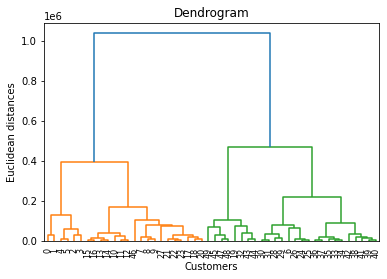

In [27]:
dendoOptimizer(X1)

In [28]:
hc, hc_labels = heirarchicalTrainer(4, X1)

In [29]:
def clusterVisualiser(data, model, noOfClusters, labels, xlabel, ylabel, model_type):
    """Plots Scatter Plot for the clusters on the Data given"""
    color= ['red', 'blue', 'green', 'cyan', 'magenta','purple']
    for i in range(0, noOfClusters):
        plt.scatter(data[labels == i, 0], data[labels == i, 1 ], s=100, c=color[i], label ='Cluster '+str(i+1))
    if model_type == 'KMeans Clustering':
        plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[
                    :, 1], s=300, c='yellow', label='Centroids')   
    plt.title('Clusters of customers using '+model_type)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

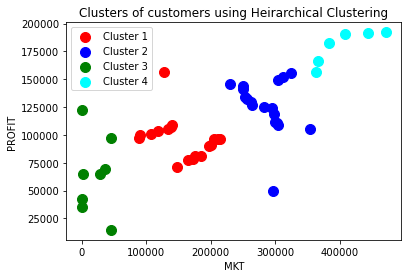

In [30]:
clusterVisualiser(X1, hc, 4, hc_labels,
                  'MKT', 'PROFIT', 'Heirarchical Clustering')